# Hepatitis: A Comprehensive Prognosis

#### Name: Waania Mahfooz Mirza
#### Email: wmm282@nyu.edu
#### New York University Stern Data Bootcamp Project

![Hepatitis](http://www.fast-trackdiagnostics.com/media/526540/FTD_hepatitis-icon.png?width=480)

## Introduction



**Liver diseases are a leading cause of deaths in today's world. This notebook has a special meaning to me as I lost my uncle to Hepatitis two weeks back and I will use this work of mine to carry out a prognosis of the Hepatitis liver disease from a dataset I found from a reliable source.** <br>

**Describing the disease WebMD quotes, "Hepatitis is an inflammation of the liver. It may be caused by drugs, alcohol use, or certain medical conditions. But in most cases, it's caused by a virus. This is known as viral hepatitis, and the most common forms are hepatitis A, B, and C. Unless the infection is diagnosed, monitored, and treated, many of these people will eventually have serious liver damage. "**<br>

**This dataset used here was obtained at UCI Machine Learning Repository. The data was donated by G.Gong from Carnegie Mellon University in conjunction with Bojan Cestnik Jozef Stefan Institute in Ljubljana. Its from November of 1988.** <br>

** The data was collected as a part of a medical study including 155 patients. 19 attributes were observed in each patient with an additional indication of whether the patient survived or died in the duration of the study. The age bracket of those studied was 7-78 years.**

## 1. Data Processing

In [1]:
#Importing libraries

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

### Reading file into a DataFrame: df

In [2]:
# importing data and replacing the ? values with NaN for easier data processing
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data'
df = pd.read_csv(url,header=None,na_values=['?'])
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


### Assigning column names

In [3]:
#Assigning column names according to the data description provided
df.columns = ['Class','Age','Sex','Stereoid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices','Bilirubin','Alk Phosphate','Sgot','Albumin','Protime','Histology']

In [4]:
#Checking if column names have been changed
df.head(5)

,Class,Age,Sex,Stereoid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


## 2. Gathering some more information about our dataset

### Data Comprehensive Summary Markdown Table (Manually Created)

| Attribute Name  	| Total Missing Values 	| Variable Category   |             Values              | Attribute Information|
|-----------------	|----------------------	|----------------------	|:----------------------------------:	| :----------------------------------:|                                                                                       
|      Class      	|           0          	|      Categorical     	|         1 (Dies) 2 (Lives)         	|Target variable                 | 
|       Age       	|           0          	|       Numerical      	| 10, 20, 30, 40, 50, 60, 70, 80     	|Age of the patient                  |
|       Sex       	|           0          	|      Categorical     	|         1 (Male),2(Female)         	|Gender of the patient                 |
|     Steroid     	|           1          	|      Categorical     	|           1 (No),2 (Yes)          	|Treatment pursued                  |
|    Antivirals   	|           0          	|      Categorical     	|            1(No),2(Yes)            	|Treatment pursued                  |
|     Fatigue     	|           1          	|      Categorical     	|            1(No),2(Yes)            	|Symptoms displayed                  | 
|     Malaise     	|           1          	|      Categorical     	|            1(No),2(Yes)            	|Symptoms displayed                 |
|     Anorexia    	|           1          	|      Categorical     	|            1(No),2(Yes)            	|Symptoms displayed                  |
|    Liver Big    	|          10          	|      Categorical     	|            1(No),2(Yes)            	|   Symptoms displayed               |
|    Liver Firm   	|          11          	|      Categorical     	|            1(No),2(Yes)            	|     Symptoms displayed             |
| Spleen Palpable 	|           5          	|      Categorical     	|            1(No),2(Yes)            	| Symptoms displayed                   |
|     Spiders     	|           5          	|      Categorical     	|            1(No),2(Yes)            	|   Symptoms displayed                 |
|     Ascites     	|           5          	|      Categorical     	|            1(No),2(Yes)            	|Symptoms displayed                  |
|     Varices     	|           5          	|      Categorical     	|            1(No),2(Yes)            	|Symptoms displayed                  |
|    Bilirubin    	|           6          	| Continuous Numerical 	| 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 	|0.3-4.8(Level of different blood markers)     |
| Alk Phosphate   	|          29          	|       Numerical      	|     33, 80, 120, 160, 200, 250     	|    33 - 250      |
|      Sgot         |           4           |       Numerical       |     13, 100, 200, 300, 400, 500       |    13 - 500      |
|     Albumin       |          16           |  Continuous Numerical |    2.1, 3.0, 3.8, 4.5, 5.0, 6.0       |2.1-6.0(level of different blood markers)     |
|     Protime       |          67           |       Numerical       |   10, 20, 30, 40, 50, 60, 70, 80, 90  |    10 - 100      |
|     Histology     |           0           |       Categorical     |             1 (No),2 (Yes)            |   -----               | 

In [5]:
# How many variables and observations
print (len(df.columns)-1)
print(df.shape[0])

19
155


**Variables:  19 <br>
Observations: 155**

In [6]:
# Data type corresponding to each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Class              155 non-null int64
Age                155 non-null int64
Sex                155 non-null int64
Stereoid           154 non-null float64
Antivirals         155 non-null int64
Fatigue            154 non-null float64
Malaise            154 non-null float64
Anorexia           154 non-null float64
Liver Big          145 non-null float64
Liver Firm         144 non-null float64
Spleen Palpable    150 non-null float64
Spiders            150 non-null float64
Ascites            150 non-null float64
Varices            150 non-null float64
Bilirubin          149 non-null float64
Alk Phosphate      126 non-null float64
Sgot               151 non-null float64
Albumin            139 non-null float64
Protime            88 non-null float64
Histology          155 non-null int64
dtypes: float64(15), int64(5)
memory usage: 24.3 KB


**Some of the categorical features are supposed to be in integer format whereas we can clearly see that they are given in float format in the dataframe. As a part of the pre - processing,I would convert all the categorical data into integer values so they could show the binary aspect of the data.**

In [26]:
# changing float values of all categorical data into int datatypes
df.iloc[:,3:-6] = df.iloc[:,3:-6].notnull().astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
Class              155 non-null int64
Age                155 non-null int64
Sex                155 non-null int64
Stereoid           155 non-null int64
Antivirals         155 non-null int64
Fatigue            155 non-null int64
Malaise            155 non-null int64
Anorexia           155 non-null int64
Liver Big          155 non-null int64
Liver Firm         155 non-null int64
Spleen Palpable    155 non-null int64
Spiders            155 non-null int64
Ascites            155 non-null int64
Varices            155 non-null int64
Bilirubin          155 non-null int64
Alk Phosphate      126 non-null float64
Sgot               151 non-null float64
Albumin            139 non-null float64
Protime            88 non-null float64
Histology          155 non-null int64
Age_Categories     155 non-null category
dtypes: category(1), float64(4), int64(16)
memory usage: 24.6 KB


**For easier processing, I would like to change the indicator of death to 0 and indicator of life to 1**

In [7]:
#Switching the indicator from 2 for living and 1 for death to 0 and 1 where 0 indicates death and 1 is living
df['Class'] = df['Class'].map({1:0,2:1})

In [8]:
# Checking how many died and how many survived?
df.iloc[:,0].value_counts()

1    123
0     32
Name: Class, dtype: int64

## 3. Missing Value Analysis

**Checking for missing values in our data**

In [23]:
# Checking for which columns have null values
df.isnull().any()

Class              False
Age                False
Sex                False
Stereoid            True
Antivirals         False
Fatigue             True
Malaise             True
Anorexia            True
Liver Big           True
Liver Firm          True
Spleen Palpable     True
Spiders             True
Ascites             True
Varices             True
Bilirubin           True
Alk Phosphate       True
Sgot                True
Albumin             True
Protime             True
Histology          False
Age_Categories     False
dtype: bool

**None of the columns have missing values except Bilirubin, Alk Phospate, Sgot, Albumin, Protime**

In [24]:
# get amount of missing values by column
missing_values = df.isnull().sum()
missing_values[0:20]

Class               0
Age                 0
Sex                 0
Stereoid            1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
dtype: int64

In [25]:
#missing-values percentage by column
df_per = (df.isnull().sum() / df.shape[0]) * 100 
df_per

Class               0.000000
Age                 0.000000
Sex                 0.000000
Stereoid            0.645161
Antivirals          0.000000
Fatigue             0.645161
Malaise             0.645161
Anorexia            0.645161
Liver Big           6.451613
Liver Firm          7.096774
Spleen Palpable     3.225806
Spiders             3.225806
Ascites             3.225806
Varices             3.225806
Bilirubin           3.870968
Alk Phosphate      18.709677
Sgot                2.580645
Albumin            10.322581
Protime            43.225806
Histology           0.000000
Age_Categories      0.000000
dtype: float64

The above table shows the percentage of missing values in the dataframe where, apart from those with 0% missing values, Protime has the highest percentage of all with 43.225% missing values and Sgot has the lowest value with 2.58%.** <br>
It would make sense to not take the findings regarding Protime very seriously since we don't have enough data to make strong conclusions.



**Let's deal with the missing values: we'll fill them with the mode values of each respective column**

In [ ]:
df['Bilirubin'].fillna(df['Bilirubin'].mode()[0], inplace=True)
df['Alk Phosphate'].fillna(df['Alk Phosphate'].mode()[0], inplace=True)
df['Sgot'].fillna(df['Sgot'].mode()[0], inplace=True)
df['Albumin'].fillna(df['Albumin'].mode()[0], inplace=True)
df['Protime'].fillna(df['Protime'].mode()[0], inplace=True)

It is important to note that filling in the missing values will generate bias, but we are doing it to have consistency for visualization. 

## 4. Exploratory Visualization


### Life vs. Death in Hepatitis

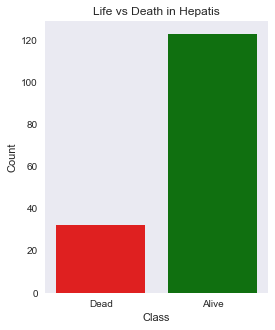

Survival  rate is 79.35483870967742% out of 155 observations


In [9]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (4, 5)
sns.set(style="dark")
clrs = ['red','green']

d = df.groupby(['Class']).size()

ax = sns.barplot(['Dead','Alive'], y=d.values,palette=clrs)
ax.set(xlabel='Class',ylabel='Count')
plt.title("Life vs Death in Hepatis")

plt.show()
print("Survival  rate is {}% out of {} observations".format(100* d[1]/(d[0]+d[1]), d[0]+d[1]))

**Findings about data**
*  Out of 155 total observed patients 123 survived and 32 died.
* Survival rate is around 79%.

We should note that since we are only looking at patients with the Hepatis disease, we are ignoring other factors that might contribute to the death, which are the external factors affecting our data. These factors could include person's age, genetics, other diseases in his mesical history, etc.

### Survival by Age Categories

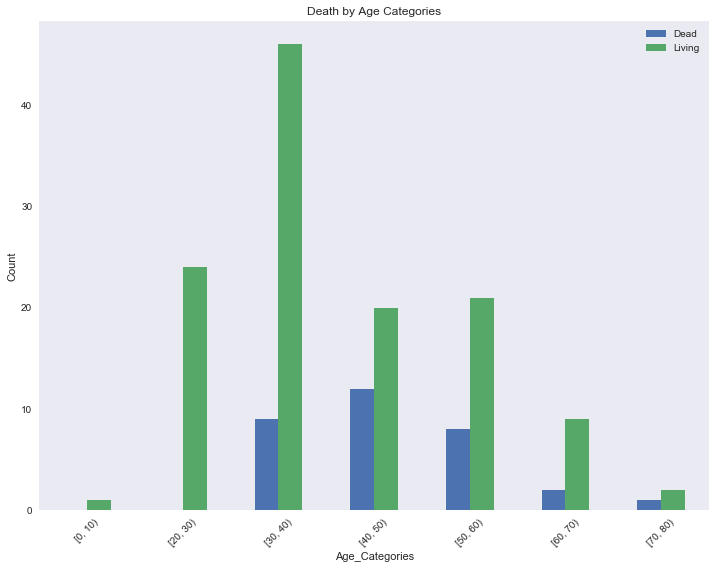

In [10]:
df['Age_Categories'] = pd.cut(df['Age'], range(0, 100, 10), right=False)

plt.rcParams["figure.figsize"] = (12, 9)
ax = df.groupby(['Age_Categories','Class']).size().unstack(fill_value=0).plot.bar(rot=45)
plt.title("Death by Age Categories")
plt.ylabel("Count")
ax.legend(["Dead", "Living"]);
plt.show()

**Findings about data**
*  Greatest amount of deaths from Hepatitis are found in the ages 40 - 50.
* There are no deaths found before the age of 30
* After passing age of 30, chances of survival compared to death is greatest in the age group of 30 - 40.

It is really interesting to see that death as compared to life declines with the age after showing a peak at the ages of 40-50.

We should also note that since this data is based on counts, it could be misleading as we are not reviewing equal number of patients in each age group.

### Survival by Gender

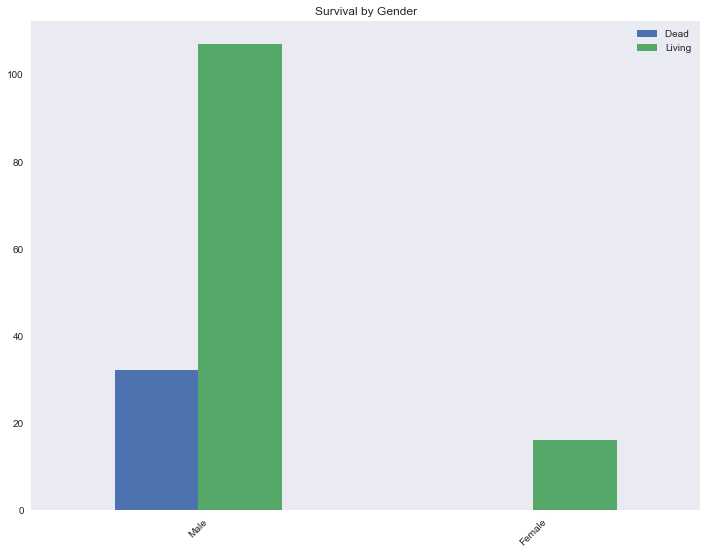

In [11]:
# 1 - male, 2 - Feamle

plt.rcParams["figure.figsize"] = (12, 9)


sex_df = df.groupby(['Sex','Class']).size().unstack(fill_value=0).copy()
sex_df.index = ['Male','Female']

ax = sex_df.plot.bar(rot=45)
ax.legend(["Dead ", "Living"]);
plt.title("Survival by Gender")
plt.show()

**Findings about data**
*  Hepatitis has only been fatal in men.
* Even in men the survival rate is much higher.
* Men contract the serious type of Hepatitis much more than women, that is why there were much more men than women in the cases picked for study. 

The results could be because men are more in the areas where the virus could be found, for example trash-collection facilities, junkyards, etc.

We should also note that since this data is based on counts, it could be misleading as we are not reviewing equal number of patients of each age sex. Yet, no deaths in women at all is an important and very interesting observation. It is very worth it to explore causes further.

### Survival by Treatment Received

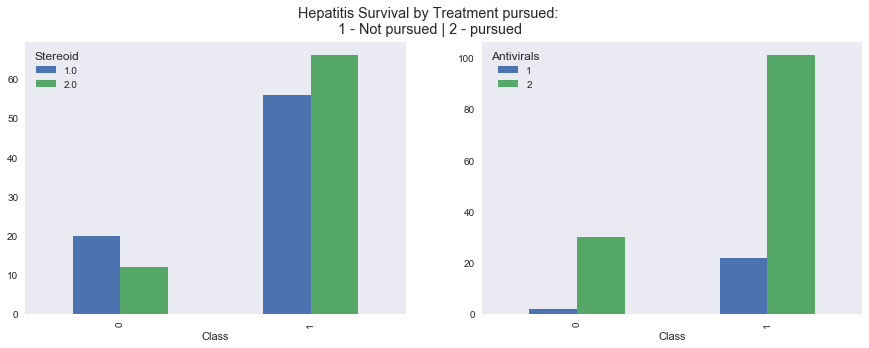

In [13]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
fig.suptitle('Hepatitis Survival by Treatment pursued: \n 1 - Not pursued | 2 - pursued \n ')

d = df.groupby(['Class', 'Stereoid']).size()

p = d.unstack(level=1).plot(kind='bar' ,ax=ax[0])

d = df.groupby(['Class', 'Antivirals']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

sns.despine()
plt.show()

**Findings about data**<br>
* This is a quite interesting analysis. <br> 
* Less than 20 people those who took Steroids passed away but more than 30 people on Antivirals treatment died. <br> 
* However, more than 100 patients survived under anti-viral treatment, whereas only about 60 of the surviving patients underwent Steroid treatment. <br> 
* Comparing the Class 1 (survival) side of both treatments, we can see that in the case of anti-virals there is a huge different in survival count between those who administered the treatment and those who did not. In the case of Steriods the count is not significantly different. This could suggest effectively of anti-virals in treatment of the disease.


### Hepatitis and Blood Sample Components

#### Let's study the survival correlation with the blood components

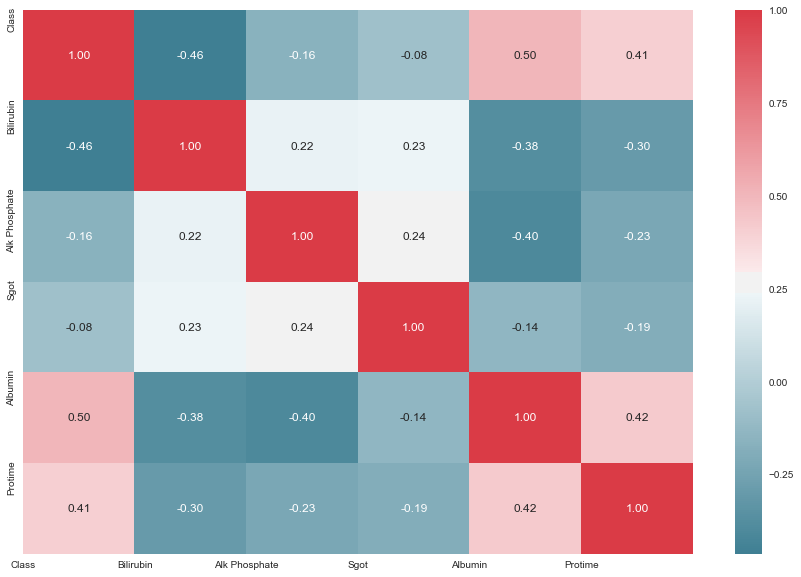

In [17]:
num_col_df = df [['Class','Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin','Protime']] 

corr = num_col_df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(15, 10))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

**Findings** <br>
From the above Heat Map we can decipher that the most correlated blood components with survival are:
* Albumin and Protime

Low levels of Albumin and Protime in blood can suggest Hepatitis and a foreboding death. <br>

It is very interesting to note that Alkaline Phospate and Bilirubin are negatively correlated with Survival. High levels of both could be a good indicator of serious Hepatitis and a foreboding death for the patient.


### Hepatis Survival Studied Through The Symptoms

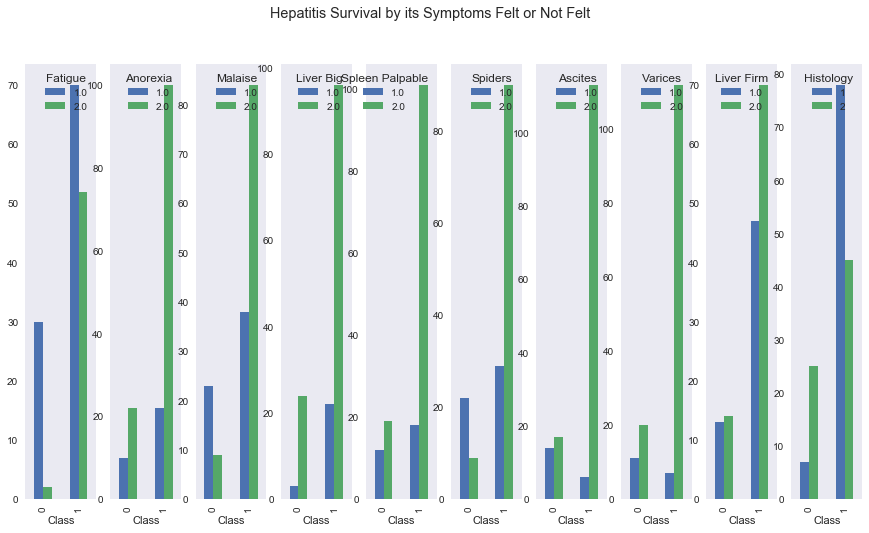

In [14]:

fig, ax = plt.subplots(1,10)
fig.set_size_inches(15,8)
fig.suptitle('Hepatitis Survival by its Symptoms Felt or Not Felt')

d = df.groupby(['Class', 'Fatigue']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['Class', 'Anorexia']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['Class', 'Malaise']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

d = df.groupby(['Class', 'Liver Big']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[3])

d = df.groupby(['Class', 'Spleen Palpable']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[4])

d = df.groupby(['Class', 'Spiders']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[5])

d = df.groupby(['Class', 'Ascites']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[6])

d = df.groupby(['Class', 'Varices']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[7])

d = df.groupby(['Class', 'Liver Firm']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[8])

d = df.groupby(['Class', 'Histology']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[9])

**Findings about the data** <br>
A lot of information that can be retrieved from the above graphs. <br>Almost 70 patient those who lived didn't experience any fatigues in Hepatitis. A lot of those who died didn't either. <br>A Small portion of the population sample those who died in Hepatitis experienced fatigue. <br>Around 22 people out of 32 of those who died of Hepatitis had suffered Anorexia.<br> Almost 25 people of those who died had Big liver. <br>
* Histology seems to be a big indicator of foreboding death. It is worth exploring the correlation much further.

** Let's look at a correlation Heat Map ** 

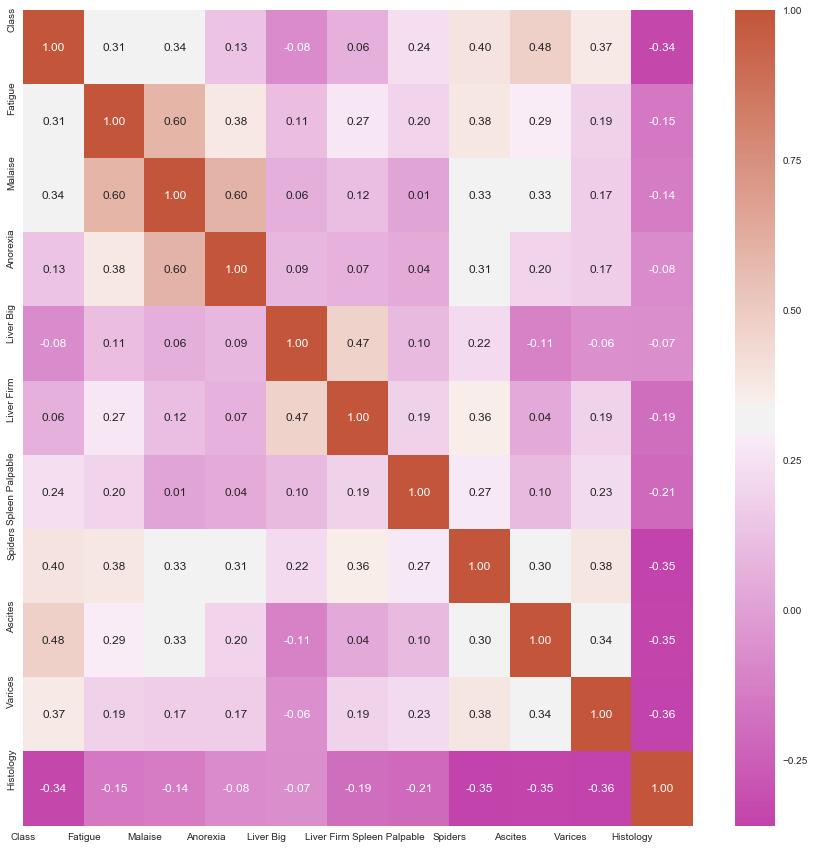

In [19]:
num_col_df = df [['Class','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices','Histology']] 

corr = num_col_df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(15, 15))
#Generate Color Map, red & magenta
colormap = sns.diverging_palette(320, 20, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

**Findings about data**

* We see that the most significant symptoms related to Hepatitis Survival are Ascites, Spiders, Malaise and Varices. <br> Other symptoms are fairly related too and should not be ignored.
* Histology does show a very strong correlation with death of the patient. 

## 5. Gender Survival & Symptom Analysis: 
### Let's look at the Symptons and Survival by Gender

**Since we found no deaths in females in our data and a strong correlation of symptoms to survival or death, it is worth exploring the symptoms through the lense of gender survival**

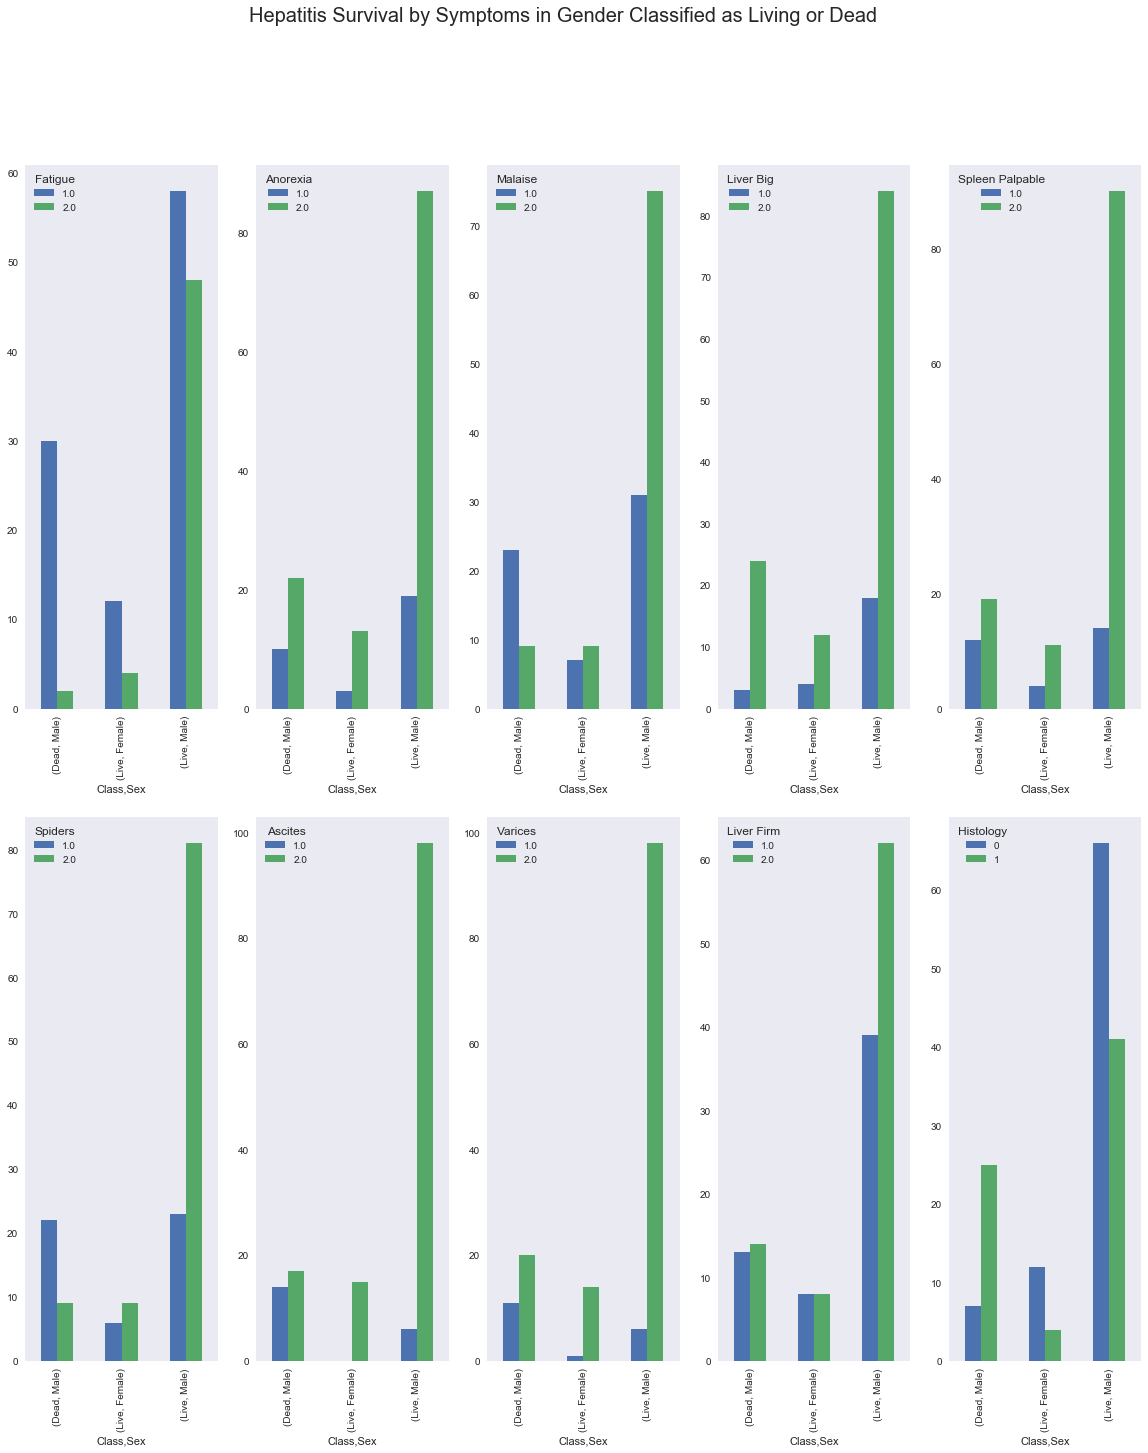

In [22]:
fig, ax = plt.subplots(2,5)
fig.set_size_inches(20,22)
fig.suptitle('Hepatitis Survival by Symptoms in Gender Classified as Living or Dead ',fontsize=20)

df_sym = df.copy()
df_sym['Class'] = df_sym['Class'].map({0:"Dead",1:'Live'})
df_sym['Histology'] = df_sym['Histology'].map({1:0,2:1})
df_sym['Sex'] = df_sym['Sex'].map({1:"Male",2:'Female'})

d = df_sym.groupby(['Class', 'Fatigue','Sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0,0])

d = df_sym.groupby(['Class', 'Anorexia','Sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0,1])

d = df_sym.groupby(['Class', 'Malaise','Sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0,2])

d = df_sym.groupby(['Class', 'Liver Big','Sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0,3])

d = df_sym.groupby(['Class', 'Spleen Palpable','Sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0,4])

d = df_sym.groupby(['Class', 'Spiders','Sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1,0])

d = df_sym.groupby(['Class', 'Ascites','Sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1,1])

d = df_sym.groupby(['Class', 'Varices','Sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1,2])

d = df_sym.groupby(['Class', 'Liver Firm','Sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1,3])

d = df_sym.groupby(['Class', 'Histology','Sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1,4])

**Findings about data**

* Big liver and Anorexia seem to be pretty common in dead males.
* Histology relates very strongly to death in males as most living male did not associate with it.
* All the of females showed Ascites symptoms. There was no even one who did not. This is an interesting area to explore: can not showing Ascites symptoms lead to death in females?
* Most of the dead males did not feel fatigue as compared to the living ones. Around 50 males who lived showed signs of fatigue. One hypothesis could be that fatigue could be an early indicator of Hepatitis and can help in early elimination. Men who did not complain of fatigue probably died because they were diagnosed in late stages.
* It appears that a lot of surviving male complained of symptoms like Ascites, Anorexia and Varices. Survival may be strongly related to early symptoms of these complications.
* It is important to note that since Anorexia and Big Liver are found both in dead and alive males, it can be deduced that those symptoms can't be good indicators of future survival of male patient.
* 50% of living women had firm liver and 50% did not. This could suggest that having a firm liver is not necessarily enlarged or diseased but does increase the likelihood of hepatomegaly. 

## 6. Statistical Analysis


**Just to work with data from our findings, I will carry out some Hypothesis Tests to test the significance of some factors that we have found relevant in our analysis. I will be using the Chi-Square Test, which is a good test for testing relationship of two categorical variables**

$H0:$There is no statistically significant relationship<br> 
$Ha:$There is a statistically significant relationship.

--------------------------------------------------------------------------------
$Test$ $for$ $Gender$ $&$ $survival$<br>


In [27]:
class_gender = pd.crosstab(index=df['Sex'],columns=df['Class'],margins=True)
class_gender.columns = ['Male','Female','rowtotal']
class_gender.index = ['Dies','Lives','coltotal']
class_gender

,Male,Female,rowtotal
Dies,32,107,139
Lives,0,16,16
coltotal,32,123,155


In [29]:
import scipy.stats as stats
stats.chi2_contingency(class_gender)

(4.641750014622448,
 0.326068856816971,
 4,
 array([[ 28.69677419, 110.30322581, 139.        ],
        [  3.30322581,  12.69677419,  16.        ],
        [ 32.        , 123.        , 155.        ]]))

Since, the p-value is greater than 0.05 our Ha is true, which is there happens to be a significant relationship between survival and gender.

--------------------------------------------------------------------
$Test$ $for$ $whether$ $liver$ $is$ $big$ $&$ $survival$<br>


In [30]:
class_liver_big = pd.crosstab(index=df['Liver Big'],columns=df['Class'],margins=True)
class_liver_big.columns=["No","Yes","rowtotal"]
class_liver_big.index =["Dies","Lives","coltotal"]
class_liver_big

,No,Yes,rowtotal
Dies,5,5,10
Lives,27,118,145
coltotal,32,123,155


In [31]:
stats.chi2_contingency(class_liver_big)

(5.622525056069526,
 0.22916751836830465,
 4,
 array([[  2.06451613,   7.93548387,  10.        ],
        [ 29.93548387, 115.06451613, 145.        ],
        [ 32.        , 123.        , 155.        ]]))

Since, the p-value is greater than 0.05 our Ha is true, which is there happens to be a significant relationship.

------------------------------------------------------
$Test$ $for$ $Anorexia$ & $Survival$<br>


In [34]:
class_anorexia = pd.crosstab(index=df['Anorexia'],columns=df['Class'],margins=True)
class_anorexia.columns=["No","Yes","rowtotal"]
class_anorexia.index =["Dies","Lives","coltotal"]
class_anorexia

,No,Yes,rowtotal
Dies,0,1,1
Lives,32,122,154
coltotal,32,123,155


In [33]:
stats.chi2_contingency(class_anorexia)

(0.2618519691690423,
 0.9921418062686891,
 4,
 array([[  0.20645161,   0.79354839,   1.        ],
        [ 31.79354839, 122.20645161, 154.        ],
        [ 32.        , 123.        , 155.        ]]))

Since, the p-value is greater than 0.05 our Ha is true, which is there happens to be a significant relationship.

----------------------------------------------------------------
$Test$ $for$ $Histology$ $&$ $survival$<br>

In [41]:
class_histology = pd.crosstab(index=df['Histology'],columns=df['Class'],margins=True)
class_histology.columns=["No","Yes","rowtotal"]
class_histology.index =["Dies","Lives","coltotal"]
class_histology

,No,Yes,rowtotal
Dies,7,78,85
Lives,25,45,70
coltotal,32,123,155


In [42]:
stats.chi2_contingency(class_histology)

(17.6927424933388,
 0.0014169221486989168,
 4,
 array([[ 17.5483871,  67.4516129,  85.       ],
        [ 14.4516129,  55.5483871,  70.       ],
        [ 32.       , 123.       , 155.       ]]))

Since, the p-value is less than 0.05 our H0 is true, which is there happens to be no significant relationship.

** ------------------------------------------------------------------------------------------------------------ **

## 7. Conclusion 

**We analysed many aspects of our data to come to a conclusions like:**
* Many of symptoms were highly correlated with Hepatitis Survival and Death. The most significant symptoms related to Hepatitis Survival are Ascites, Spiders, Malaise and Varices. My conclusion is that this is because patients who survive complain of symptoms more and in the early stages - and so are likely to get treated on time and given extra care.
* Big Liver and Anorexia have been found to be two big symptoms expressed by patients who died of Hepatitis. After our Chi-Square Test, both the symptoms showed significant relation. It would be best to introduce extra patient care for those showing these two symptoms.
* The most correlated blood components with Survival are: Albumin and Protime. Low levels of Albumin and Protime in blood can suggest Hepatitis and a foreboding death. Patients should be monitered for any shortages of these components in blood, specially in early stages. A death could be prevented if early prevention is introduced.
* We also saw that women are extremely unlikely to die from Hepatitis as opposed to men. Our Chi-Square Test also confirmed the strong relation of gender to survival. <br> <br>
Our dataset was highly skewed, which means minority is highly outnumbered by one or more classes. It is a challenge but such datasets are common. In medical sets like these where patients are randomly picked, one cannot have same number of samples in each class or variable, specially when looking at death and life data of patients. One way to resolve this issue is to re-sample the data-set in order to offset the imbalance with hopes of getting more fair set.

